In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
def display_pie(pie_values, pie_labels, colors=None,title=''):
    plt.axis("equal")
    plt.pie(pie_values, labels=pie_labels, colors=colors, autopct="%1.1f%%")
    plt.title(title)
    plt.show()

In [122]:
# Load Real Market Data
data = pd.read_csv('../data/adj-market-data.csv', parse_dates=['Date'])

data.set_index('Date', inplace=True)

In [124]:
data.head()

,SP500,HUM,O,PEP,AMZN,BXLT,BKNG,MMM,PYPL,ATVI,...,ETSY,MJN,HON,GOLD,KVUE,GEHC,SP500FUT,VLTO,VIX,OGN
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-09,1409.13,85.79,-21992.00,78.74,4261.0,NaN,-102.85,80.19,NaN,-13765.00,...,NaN,NaN,54835.0,879.5,NaN,NaN,1411.50,NaN,24.89,NaN
2008-01-10,1420.33,85.07,-22311.00,79.57,4213.0,NaN,-102.78,80.21,NaN,-14015.00,...,NaN,NaN,55044.0,891.7,NaN,NaN,1421.00,NaN,24.07,NaN
2008-01-11,1401.02,84.28,-22.36,77.78,4054.0,NaN,-96.24,77.58,NaN,-13.57,...,NaN,NaN,54073.0,896.1,NaN,NaN,1407.75,NaN,24.96,NaN
2008-01-14,1416.25,86.98,-21789.00,76.92,4144.0,NaN,-100.52,78.50,NaN,-13.55,...,NaN,NaN,55016.0,901.6,NaN,NaN,1420.25,NaN,23.36,NaN
2008-01-15,1380.95,86.42,-21382.00,74.83,4012.0,NaN,-103.28,77.18,NaN,-13275.00,...,NaN,NaN,53826.0,901.0,NaN,NaN,1388.00,NaN,24.04,NaN


In [125]:
# selected_assets = ['AMZN','ABNB','COF','FSLR','ANF',
#                    'BG','CCL','DHI','CTSH','DXC']

selected_assets = ['HUM','AMZN','MMM','COF','FSLR','ANF','BG','CCL','DHI','CTSH','DXC',
                   'LRCX','AIG','IVZ','FL','KSS','TNL','CSCO','CMI','DLTR','SO','DLR','DVN','EL','KIM','J','SLB']	

data = data[selected_assets].abs()

In [126]:
data.head()

,HUM,AMZN,MMM,COF,FSLR,ANF,BG,CCL,DHI,CTSH,...,CSCO,CMI,DLTR,SO,DLR,DVN,EL,KIM,J,SLB
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-09,85.79,4261.0,80.19,43191.0,234.25,75.08,128.59,40.26,10.53,15.52,...,26.24,51.98,7.3,40.50,34.83,87434.0,20.98,32.87,86.31,98.61
2008-01-10,85.07,4213.0,80.21,42762.0,225.97,73.37,127.10,40.46,11.14,14.99,...,26.24,52.68,7613.0,40.21,34.93,86808.0,20.91,33.08,90.53,97.09
2008-01-11,84.28,4054.0,77.58,42433.0,221.00,70.86,129.35,39.56,11.05,13555.00,...,25.87,49.56,7417.0,39.76,34.67,85358.0,19.38,32.58,88.71,94.01
2008-01-14,86.98,4144.0,78.50,42912.0,224.76,71.38,133.00,39.44,11.54,14175.00,...,26.29,51.71,7377.0,39.61,35.57,88325.0,19.29,31.85,89.44,95.53
2008-01-15,86.42,4012.0,77.18,41846.0,204.79,70.20,127.21,38.99,11.30,13335.00,...,25.85,47.94,7.1,39.31,34.17,85486.0,19.02,30.47,82.13,88.93


In [127]:
returns = data.pct_change()
returns = returns.iloc[1:]               # Deletes the first row that has no daily return
returns = returns.dropna(axis='columns') # Filter out stocks with NaNs

returns.head()

,HUM,AMZN,MMM,COF,FSLR,ANF,BG,CCL,DHI,CTSH,...,CSCO,CMI,DLTR,SO,DLR,DVN,EL,KIM,J,SLB
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-10,-0.008393,-0.011265,0.000249,-0.009933,-0.035347,-0.022776,-0.011587,0.004968,0.057930,-0.034149,...,0.000000,0.013467,1041.876712,-0.007160,0.002871,-0.007160,-0.003337,0.006389,0.048894,-0.015414
2008-01-11,-0.009286,-0.037740,-0.032789,-0.007694,-0.021994,-0.034210,0.017703,-0.022244,-0.008079,903.269513,...,-0.014101,-0.059226,-0.025745,-0.011191,-0.007443,-0.016704,-0.073171,-0.015115,-0.020104,-0.031723
2008-01-14,0.032036,0.022200,0.011859,0.011288,0.017014,0.007338,0.028218,-0.003033,0.044344,0.045740,...,0.016235,0.043382,-0.005393,-0.003773,0.025959,0.034759,-0.004644,-0.022406,0.008229,0.016168
2008-01-15,-0.006438,-0.031853,-0.016815,-0.024842,-0.088850,-0.016531,-0.043534,-0.011410,-0.020797,-0.059259,...,-0.016736,-0.072907,-0.999038,-0.007574,-0.039359,-0.032143,-0.013997,-0.043328,-0.081731,-0.069088
2008-01-16,-0.000926,0.001496,0.001555,-0.998963,-0.113433,0.025641,-0.066661,0.013850,0.018584,-0.999018,...,-0.027079,-0.039841,1069.845070,-0.003053,0.019608,-0.036883,0.019453,0.028224,-0.065628,-0.034072


In [128]:
# Covariance matrix
covariance_matrix = returns.cov()

covariance_matrix.head(10)

,HUM,AMZN,MMM,COF,FSLR,ANF,BG,CCL,DHI,CTSH,...,CSCO,CMI,DLTR,SO,DLR,DVN,EL,KIM,J,SLB
HUM,0.000486,-0.054563,0.000113,-0.006131,-0.092069,0.000165,0.000143,0.000182,0.000172,0.084774,...,0.007030,0.000168,0.037759,0.000076,0.000127,0.063523,-0.040663,0.000169,0.000169,0.000161
AMZN,-0.054563,85666.096033,0.007259,-1017.455281,119.698227,0.186093,0.038439,0.003197,-0.033799,-1750.342143,...,-410.006171,-0.149932,-2637.193853,-0.059213,-0.018537,-2426.653205,424.588636,0.049004,-0.088269,-0.059735
MMM,0.000113,0.007259,0.000231,0.024270,-0.003889,0.000180,0.000128,0.000206,0.000190,0.005632,...,0.043118,0.000219,0.037216,0.000079,0.000143,0.015220,0.062359,0.000206,0.000199,0.000192
COF,-0.006131,-1017.455281,0.024270,73409.368554,470.164439,0.136013,-0.029932,0.017637,-0.011790,643.939796,...,-127.894979,-0.072976,3665.845052,-0.031254,0.075148,1912.302043,1223.576742,0.224419,0.036466,0.064913
FSLR,-0.092069,119.698227,-0.003889,470.164439,21999.425960,0.097177,0.038149,0.082541,0.011417,2361.980198,...,1359.947891,0.020264,135.096656,-0.029134,-0.034960,1165.973994,342.564035,0.029639,0.043246,0.047124
ANF,0.000165,0.186093,0.000180,0.136013,0.097177,0.001245,0.000190,0.000452,0.000345,-0.136226,...,0.184927,0.000292,-0.092750,0.000075,0.000172,-0.158133,-0.011513,0.000384,0.000280,0.000296
BG,0.000143,0.038439,0.000128,-0.029932,0.038149,0.000190,0.000484,0.000228,0.000190,0.107904,...,0.016745,0.000232,-0.024516,0.000082,0.000130,0.045715,-0.081459,0.000211,0.000246,0.000271
CCL,0.000182,0.003197,0.000206,0.017637,0.082541,0.000452,0.000228,0.000983,0.000373,0.019236,...,0.007543,0.000345,0.050591,0.000096,0.000220,-0.045895,0.099168,0.000473,0.000299,0.000374
DHI,0.000172,-0.033799,0.000190,-0.011790,0.011417,0.000345,0.000190,0.000373,0.000860,0.092765,...,-0.115890,0.000316,0.114198,0.000100,0.000301,0.174834,-0.143243,0.000428,0.000325,0.000262
CTSH,0.084774,-1750.342143,0.005632,643.939796,2361.980198,-0.136226,0.107904,0.019236,0.092765,96194.023480,...,4073.164133,0.085491,10301.796277,-0.039133,0.061143,3494.246762,7026.391250,0.049724,-0.054955,0.104652


In [129]:
# Extract upper triangular elements of covariance matrix
upper_triangular_covariance = np.triu(covariance_matrix)

upper_triangular_covariance = pd.DataFrame(index=covariance_matrix.index,
                                           data=upper_triangular_covariance, 
                                           columns=covariance_matrix.columns)
upper_triangular_covariance.head(10)

,HUM,AMZN,MMM,COF,FSLR,ANF,BG,CCL,DHI,CTSH,...,CSCO,CMI,DLTR,SO,DLR,DVN,EL,KIM,J,SLB
HUM,0.000486,-0.054563,0.000113,-0.006131,-0.092069,0.000165,0.000143,0.000182,0.000172,0.084774,...,0.007030,0.000168,0.037759,0.000076,0.000127,0.063523,-0.040663,0.000169,0.000169,0.000161
AMZN,0.000000,85666.096033,0.007259,-1017.455281,119.698227,0.186093,0.038439,0.003197,-0.033799,-1750.342143,...,-410.006171,-0.149932,-2637.193853,-0.059213,-0.018537,-2426.653205,424.588636,0.049004,-0.088269,-0.059735
MMM,0.000000,0.000000,0.000231,0.024270,-0.003889,0.000180,0.000128,0.000206,0.000190,0.005632,...,0.043118,0.000219,0.037216,0.000079,0.000143,0.015220,0.062359,0.000206,0.000199,0.000192
COF,0.000000,0.000000,0.000000,73409.368554,470.164439,0.136013,-0.029932,0.017637,-0.011790,643.939796,...,-127.894979,-0.072976,3665.845052,-0.031254,0.075148,1912.302043,1223.576742,0.224419,0.036466,0.064913
FSLR,0.000000,0.000000,0.000000,0.000000,21999.425960,0.097177,0.038149,0.082541,0.011417,2361.980198,...,1359.947891,0.020264,135.096656,-0.029134,-0.034960,1165.973994,342.564035,0.029639,0.043246,0.047124
ANF,0.000000,0.000000,0.000000,0.000000,0.000000,0.001245,0.000190,0.000452,0.000345,-0.136226,...,0.184927,0.000292,-0.092750,0.000075,0.000172,-0.158133,-0.011513,0.000384,0.000280,0.000296
BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000484,0.000228,0.000190,0.107904,...,0.016745,0.000232,-0.024516,0.000082,0.000130,0.045715,-0.081459,0.000211,0.000246,0.000271
CCL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000983,0.000373,0.019236,...,0.007543,0.000345,0.050591,0.000096,0.000220,-0.045895,0.099168,0.000473,0.000299,0.000374
DHI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000860,0.092765,...,-0.115890,0.000316,0.114198,0.000100,0.000301,0.174834,-0.143243,0.000428,0.000325,0.000262
CTSH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96194.023480,...,4073.164133,0.085491,10301.796277,-0.039133,0.061143,3494.246762,7026.391250,0.049724,-0.054955,0.104652


#### Entire Cov. Matrix

In [130]:
%%time
from docplex.mp.model import Model
import numpy as np

# Number of assets
num_assets = len(data.columns)

# Define the data - Expected returns of assets
returns = np.array(returns)  

# Covariance matrix
covariance_matrix = np.array(covariance_matrix)

# Create a model
model = Model(name='Markowitz_Portfolio')

# Define variables
w = {i: model.continuous_var(name='w{}'.format(i)) for i in range(num_assets)}

# Define objective function (minimize portfolio risk)
objective = model.sum(covariance_matrix[i, j] * w[i] * w[j] for i in range(covariance_matrix.shape[0]) for j in range(covariance_matrix.shape[1]))

model.minimize(objective)

# Define constraints
model.add_constraint(model.sum(w[i] for i in range(num_assets)) == 1)  # Total investment equals 100%
model.add_constraints(w[i] >= 0 for i in range(num_assets))  # No short selling

# Solve the model
solution = model.solve()
func_obj_a = model.objective_value

# Display results
if solution:
    optimal_portfolio_a = {i: solution.get_value(w[i]) for i in range(num_assets) if solution.get_value(w[i]) != 0}
    print(f'Model Objective value a  :{func_obj_a}')
    print("Optimal Portfolio Weights:")
    for i in range(num_assets):
            print("Asset {}: {:.2f}%".format(i, optimal_portfolio_a[i] * 100))
    print()
else:
    print("No solution found.")


Model Objective value a  :0.00012730525079613557
Optimal Portfolio Weights:
Asset 0: 8.47%
Asset 1: 0.00%
Asset 2: 25.83%
Asset 3: 0.00%
Asset 4: 0.00%
Asset 5: 0.11%
Asset 6: 6.38%
Asset 7: 0.00%
Asset 8: 0.00%
Asset 9: 0.00%
Asset 10: 0.00%
Asset 11: 0.00%
Asset 12: 0.00%
Asset 13: 0.00%
Asset 14: 1.74%
Asset 15: 0.14%
Asset 16: 0.00%
Asset 17: 0.00%
Asset 18: 0.00%
Asset 19: 0.00%
Asset 20: 54.91%
Asset 21: 2.41%
Asset 22: 0.00%
Asset 23: 0.00%
Asset 24: 0.00%
Asset 25: 0.00%
Asset 26: 0.00%

CPU times: total: 31.2 ms
Wall time: 30 ms


In [131]:
portfolio_a = pd.DataFrame.from_dict(optimal_portfolio_a, orient='index')
portfolio_a.reset_index(inplace=True)
portfolio_a.columns = ["asset", "weight"]
portfolio_a["asset"] = selected_assets


portfolio_a

,asset,weight
0,HUM,8.474882e-02
1,AMZN,3.874084e-07
2,MMM,2.583391e-01
3,COF,1.487053e-07
4,FSLR,9.384893e-07
5,ANF,1.052300e-03
6,BG,6.381164e-02
7,CCL,1.515804e-06
8,DHI,1.911981e-06
9,CTSH,4.206663e-08


#### Upper Triangular Cov. Matrix - np.triu()

In [132]:
%%time
from docplex.mp.model import Model
import numpy as np

# Number of assets
num_assets = len(data.columns)

# Define the data - Expected returns of assets
returns = np.array(returns)  

# Covariance matrix
covariance_matrix = np.array(covariance_matrix)  

# Extract upper triangular elements of covariance matrix
upper_triangular_covariance = np.triu(covariance_matrix)

# Create a model
model = Model(name='Markowitz_Portfolio')

# Define variables
w = {i: model.continuous_var(name='w{}'.format(i)) for i in range(num_assets)}

# Define objective function (minimize portfolio risk)
objective = model.sum(upper_triangular_covariance[i, j] * w[i] * w[j] for i in range(covariance_matrix.shape[0]) for j in range(covariance_matrix.shape[1]))
model.minimize(objective)

# Define constraints
model.add_constraint(model.sum(w[i] for i in range(num_assets)) == 1)  # Total investment equals 100%
model.add_constraints(w[i] >= 0 for i in range(num_assets))  # No short selling

# Solve the model
solution = model.solve()
func_obj_b = model.objective_value

# Display results
if solution:
    optimal_portfolio_b = {i: solution.get_value(w[i]) for i in range(num_assets) if solution.get_value(w[i]) != 0}
    print(f'Model Objective value b  :{func_obj_b}')
    print("Optimal Portfolio Weights:")
    for i in range(num_assets):
        print("Asset {}: {:.2f}%".format(i, optimal_portfolio_b[i] * 100))
    print()
else:
    print("No solution found.")


Model Objective value b  :9.334752038370665e-05
Optimal Portfolio Weights:
Asset 0: 9.28%
Asset 1: 0.00%
Asset 2: 21.60%
Asset 3: 0.00%
Asset 4: 0.00%
Asset 5: 1.23%
Asset 6: 7.87%
Asset 7: 0.20%
Asset 8: 0.86%
Asset 9: 0.00%
Asset 10: 0.00%
Asset 11: 0.00%
Asset 12: 0.00%
Asset 13: 0.00%
Asset 14: 3.04%
Asset 15: 2.12%
Asset 16: 0.00%
Asset 17: 0.00%
Asset 18: 1.40%
Asset 19: 0.00%
Asset 20: 41.41%
Asset 21: 7.00%
Asset 22: 0.00%
Asset 23: 0.00%
Asset 24: 0.00%
Asset 25: 1.79%
Asset 26: 2.20%

CPU times: total: 15.6 ms
Wall time: 22 ms


In [133]:
portfolio_b = pd.DataFrame.from_dict(optimal_portfolio_b, orient='index')
portfolio_b.reset_index(inplace=True)
portfolio_b.columns = ["asset", "weight"]
portfolio_b["asset"] = selected_assets

portfolio_b

,asset,weight
0,HUM,9.277650e-02
1,AMZN,1.744628e-07
2,MMM,2.159812e-01
3,COF,6.124016e-08
4,FSLR,3.489257e-07
5,ANF,1.230163e-02
6,BG,7.865727e-02
7,CCL,1.958208e-03
8,DHI,8.629369e-03
9,CTSH,3.271602e-08


#### Upper Triangular Cov. Matrix

In [134]:
%%time
from docplex.mp.model import Model
import numpy as np

# Number of assets
num_assets = len(data.columns)

# Define the data - Expected returns of assets
returns = np.array(returns)  

# Covariance matrix
covariance_matrix = np.array(covariance_matrix) 

# Extract upper triangular elements of covariance matrix
upper_triangular_covariance = np.triu(covariance_matrix)

# Create a model
model = Model(name='Markowitz_Portfolio')

# Define variables
w = {i: model.continuous_var(name='w{}'.format(i)) for i in range(num_assets)}

# Define objective function (minimize portfolio risk)
objective = model.sum(covariance_matrix[i, j] * w[i] * w[j] for i in range(covariance_matrix.shape[0]) for j in range(i, covariance_matrix.shape[1]))
model.minimize(objective)

# Define constraints
model.add_constraint(model.sum(w[i] for i in range(num_assets)) == 1)  # Total investment equals 100%
model.add_constraints(w[i] >= 0 for i in range(num_assets))  # No short selling

# Solve the model
solution = model.solve()
func_obj_c = model.objective_value

# Display results
if solution:
    optimal_portfolio_c = {i: solution.get_value(w[i]) for i in range(num_assets) if solution.get_value(w[i]) != 0}
    print(f'Model Objective value c   :{func_obj_c}')
    print("Optimal Portfolio Weights:")
    for i in range(num_assets):
        print("Asset {}: {:.2f}%".format(i, optimal_portfolio_c[i] * 100))
    print()
else:
    print("No solution found.")


Model Objective value c   :9.334752038370665e-05
Optimal Portfolio Weights:
Asset 0: 9.28%
Asset 1: 0.00%
Asset 2: 21.60%
Asset 3: 0.00%
Asset 4: 0.00%
Asset 5: 1.23%
Asset 6: 7.87%
Asset 7: 0.20%
Asset 8: 0.86%
Asset 9: 0.00%
Asset 10: 0.00%
Asset 11: 0.00%
Asset 12: 0.00%
Asset 13: 0.00%
Asset 14: 3.04%
Asset 15: 2.12%
Asset 16: 0.00%
Asset 17: 0.00%
Asset 18: 1.40%
Asset 19: 0.00%
Asset 20: 41.41%
Asset 21: 7.00%
Asset 22: 0.00%
Asset 23: 0.00%
Asset 24: 0.00%
Asset 25: 1.79%
Asset 26: 2.20%

CPU times: total: 15.6 ms
Wall time: 20.8 ms


In [135]:
portfolio_c = pd.DataFrame.from_dict(optimal_portfolio_c, orient='index')
portfolio_c.reset_index(inplace=True)
portfolio_c.columns = ["asset", "weight"]
portfolio_c["asset"] = selected_assets

portfolio_c

,asset,weight
0,HUM,9.277650e-02
1,AMZN,1.744628e-07
2,MMM,2.159812e-01
3,COF,6.124016e-08
4,FSLR,3.489257e-07
5,ANF,1.230163e-02
6,BG,7.865727e-02
7,CCL,1.958208e-03
8,DHI,8.629369e-03
9,CTSH,3.271602e-08


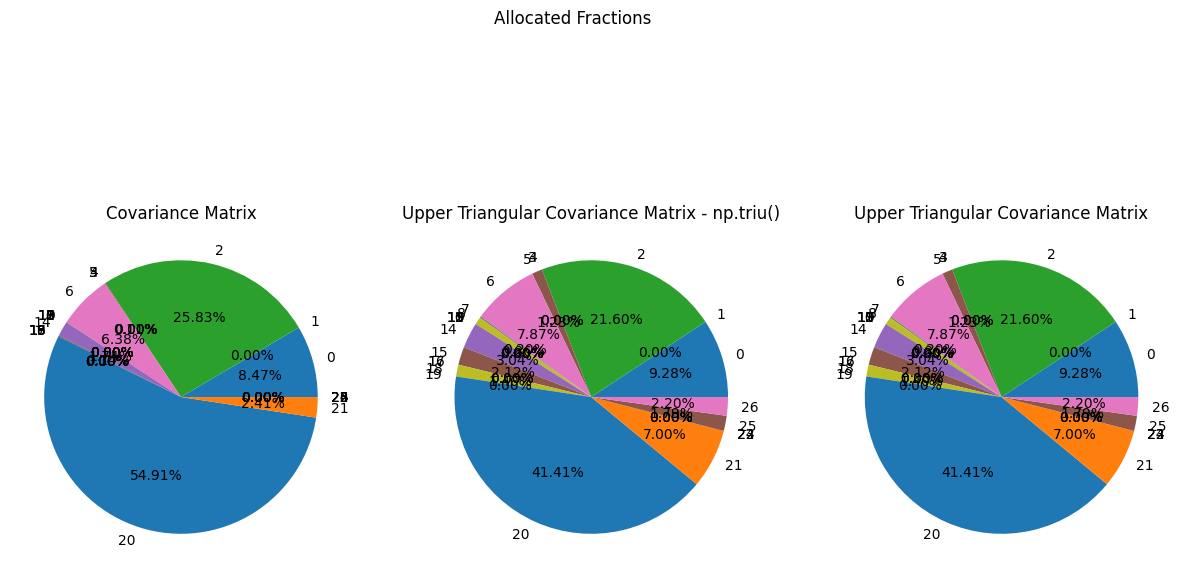

In [136]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Allocated Fractions')

ax1.title.set_text('Covariance Matrix')
ax2.title.set_text('Upper Triangular Covariance Matrix - np.triu()')
ax3.title.set_text('Upper Triangular Covariance Matrix')


ax1.pie(list(optimal_portfolio_a.values()), labels=list(optimal_portfolio_a), autopct="%1.2f%%")
ax2.pie(list(optimal_portfolio_b.values()), labels=list(optimal_portfolio_b), autopct="%1.2f%%");
ax3.pie(list(optimal_portfolio_c.values()), labels=list(optimal_portfolio_c), autopct="%1.2f%%");

In [137]:
func_obj_a - func_obj_b

3.395773041242892e-05

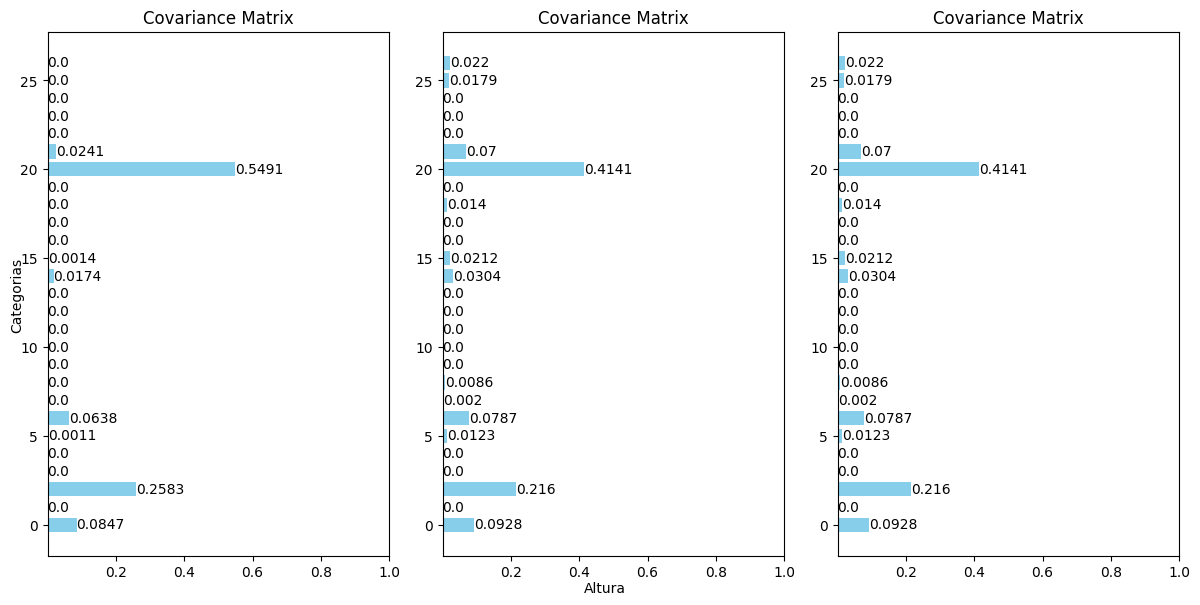

In [138]:
import matplotlib.pyplot as plt

def plot_bar_chart(data_list):
    num_categories = len(data_list[0])  # Assumindo que todos os dicionários têm o mesmo número de categorias
    
    fig, axs = plt.subplots(1, len(data_list), figsize=(12, 6))  # Criar subplots

    for i, data in enumerate(data_list):
        categories = list(data.keys())
        values = list(data.values())

        # Normalizar os valores para que a soma seja 1
        total = sum(values)
        normalized_values = [value / total for value in values]
        
        axs[i].barh(categories, normalized_values, color='skyblue')  # Usando plt.barh para barras horizontais

        # Adicionar os valores numéricos arredondados às barras com até 4 casas decimais
        for j, value in enumerate(normalized_values):
            rounded_value = round(value, 4)
            axs[i].text(value, j, str(rounded_value), ha='left', va='center')

        # Adicionar rótulos ao subplot
        # axs[i].set_xlabel('Altura')
        # axs[i].set_ylabel('Categorias')
        axs[i].set_title('Covariance Matrix')
        
        # Definir limites do eixo x
        axs[i].set_xlim(0.0000000001, 1)

        # axs[i].grid(True)

    # Adicionar rótulos gerais aos eixos X e Y
    fig.text(0.5, 0.004, 'Altura', ha='center')
    fig.text(0.004, 0.5, 'Categorias', va='center', rotation='vertical')

    plt.tight_layout()  # Ajustar o layout para evitar sobreposição
    plt.show()

# Exemplo de lista de dicionários de entrada
data_list = [optimal_portfolio_a,
             optimal_portfolio_b,
             optimal_portfolio_c]

# Criar os diagramas de barras
plot_bar_chart(data_list)
